In [96]:
"""
This program will further display Deep Learning in Python
Name: Maciek Stuczyk
Original code Author: josephlee94
Assignment: Hw11 Part 3
Class: CIS-2532-NET01
"""

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [49]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [50]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [51]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

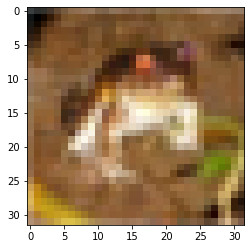

In [53]:
img = plt.imshow(x_train[0])

In [54]:
print('The label is:', y_train[0])

The label is: [6]


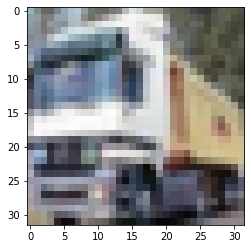

In [55]:
img = plt.imshow(x_train[1])

In [56]:
print('The label is:', y_train[1])

The label is: [9]


In [57]:
import keras
from keras.utils import np_utils
y_train_one_hot = keras.utils.np_utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.np_utils.to_categorical(y_test, 10)

In [58]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [60]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [64]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [65]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [66]:
model.add(Dropout(0.25))

In [67]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(512, activation='relu'))

In [70]:
model.add(Dropout(0.5))

In [71]:
model.add(Dense(10, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [73]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 63s 50ms/step - loss: 1.5884 - accuracy: 0.4207 - val_loss: 1.1676 - val_accuracy: 0.5894
Epoch 2/20
1250/1250 [==============================] - 61s 49ms/step - loss: 1.1414 - accuracy: 0.5924 - val_loss: 0.9988 - val_accuracy: 0.6408
Epoch 3/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.9828 - accuracy: 0.6536 - val_loss: 0.8984 - val_accuracy: 0.6837
Epoch 4/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.8791 - accuracy: 0.6893 - val_loss: 0.7910 - val_accuracy: 0.7184
Epoch 5/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.8056 - accuracy: 0.7175 - val_loss: 0.7502 - val_accuracy: 0.7369
Epoch 6/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.7420 - accuracy: 0.7393 - val_loss: 0.7425 - val_accuracy: 0.7389
Epoch 7/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6979 - accuracy: 0.7520 - val_loss: 0.6978 -

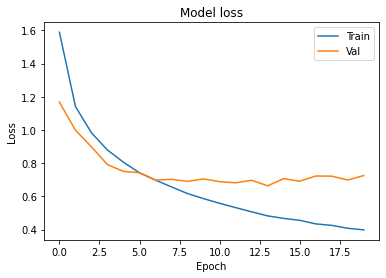

In [75]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

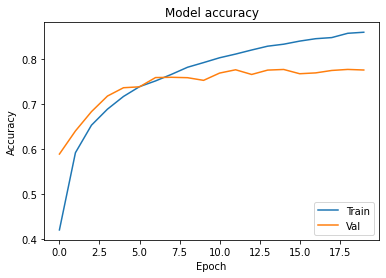

In [76]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [77]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 3s 11ms/step - loss: 0.7349 - accuracy: 0.7759


0.7759000062942505

In [78]:
model.save('my_cifar10_model.h5')

In [79]:
my_image = plt.imread("cat.jpg")

In [80]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

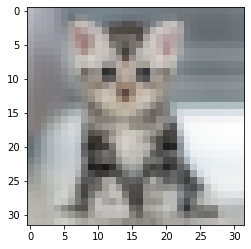

In [92]:
img = plt.imshow(my_image_resized)

In [93]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [94]:
probabilities

array([[4.7045527e-03, 3.3751276e-06, 4.3611674e-04, 1.2680078e-01,
        1.0835108e-03, 5.4119903e-01, 5.0039933e-05, 3.2495871e-01,
        6.4208900e-04, 1.2178255e-04]], dtype=float32)

In [95]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities)

Most likely class: dog -- Probability: 0.541199
Second most likely class: horse -- Probability: 0.3249587
Third most likely class: cat -- Probability: 0.12680078
Fourth most likely class: airplane -- Probability: 0.0047045527
Fifth most likely class: deer -- Probability: [[4.7045527e-03 3.3751276e-06 4.3611674e-04 1.2680078e-01 1.0835108e-03
  5.4119903e-01 5.0039933e-05 3.2495871e-01 6.4208900e-04 1.2178255e-04]]
